<a href="https://colab.research.google.com/github/fernandodeeke/can2025/blob/main/newton_raphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> </h1></center>
<center><h1>Cálculo Numérico CAN0001</h1></center>
<center><h2>2025/1</h2></center>
<center><h3>Fernando Deeke Sasse</h3></center>
<center><h3>CCT - UDESC</h3></center>
<center><h2>Zeros de Funções: Método de Newton-Raphson</h2></center>

### 1. Introdução

Seja $f(x)$ uma função suave e contínua e $x_r$ uma raiz desconhecida de $f(x)$. Suponhamos que $x_0$ é uma tentativa inicial para $x_r$, preferencialmente um ponto próximo a $x_0$. Suponde que  $x_0$ está suficientemente próximo ta $x_r$, veremos como podemos melhorar esse palpite, tomando uma aproximação linear de $f(x)$ na vizinhança de $x_0$. Geometricamente isso corresponde a traçar um reta tangente ao gráfico de $(f(x)$ e determinar a intersecção desta reta com o eixo $x$.  

Matematicamente, a aproximação de  $f(x)$ em torno de $x_0$ corresponde à aproximação $f(x) \approx f(x_0) + f^{\prime}(x_0)(x-x_0)$. Usando tal aproximação, determinamos $x_1$ tal que $f(x_1) = 0$, ou seja,

$$
0 = f(x_0) + f^{\prime}(x_0)(x_1-x_0).
$$
Resolvendo para  $x_1$ obtemos
$$
x_1 = x_0 - \frac{f(x_0)}{f^{\prime}(x_0)}.
$$

Uma interpretação geométrica deste processo é mostrada na Figura abaixo.


<img src="19.04.01-Newton-step.png" alt="Newton Step" title="Illustration of Newton step for a smooth function, g(x)." width="200"/>

O chamado *processo de Newton-Raphson* consiste em utilizar esta aproximação de modo iterativo:

$$
x_{i+1} = x_{i} - \frac{g(x_{i})}{g^{\prime}(x_{i})},
$$

até que $|x_{i+1}-x_i|<\epsilon$, sendo $\epsilon$ uma tolerância previamente especificada.

Outras explicações deste método podem ser encontrada no [item da Wikipedia](https://pt.wikipedia.org/wiki/Método_de_Newton–Raphson),  ou [esta página do MIT](https://web.mit.edu/10.001/Web/Course_Notes/NLAE/node6.html).

### 2. Implementação do Método de Newton Raphson

Inicialmente carregamos as bibliotecas imediatamente necessárias, que são a biblioteca de gráficos e a de matemática simbólica:

In [ ]:
from matplotlib.pyplot import *
from sympy import *
init_printing()

Suponhamos que queremos determinar as raízes reais da equação $x^2-\sin x-1/2=0$. Definimos inicialmente a variável *x* como sendo simbólica:

In [ ]:
x=symbols('x')

Podemos agora definir a função:

In [ ]:
f= Lambda(x, x**2-sin(x)-1/2)
f(x)

Agora é simples avaliar a função em qualquer ponto. Por exemplo,

In [ ]:
f(1)

Notemos que a função seno não foi avaliada em ponto flutuante. Para que isso
ocorra devemos usar argumentos em ponto flutuante:

In [ ]:
f(1.)

Façamos um gráfico desta função para localizar as raízes:

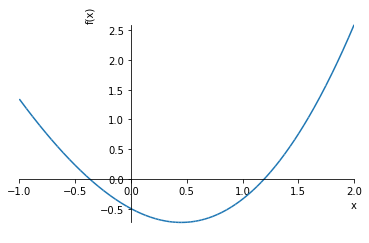

In [ ]:
plot(f(x),(x,-1,2))

Como o termo quadrático é dominante para grandes magnitudes de *x* sabemos que estas são as únicas raízes reais. O [processo iterativo de Newton-Raphson](https://pt.wikipedia.org/wiki/Método_de_Newton–Raphson) tem a forma
$$
x_{i+1}=x_i-\frac{f(x_i)}{f'(x_i)}\,.
$$

Para definir a função $f'(x)$ procedemos da seguinte forma:

Inicialmente calculamos a derivada:

In [ ]:
df=diff(f(x),x)
df

Notemos que esta ainda não é uma função. Por exemplo, a seguinte entrada gera um erro: df(x)

Devemos definir a função derivada com o comando Lambda:

In [ ]:
Df= Lambda(x,df)
Df(x)

Por exemplo,

In [ ]:
Df(1.)

Dado um ponto inicial, digamos $x_0=-0.5$, podemos agora realizar uma iteração:

In [ ]:
x0=-0.5
x1=x0-f(x0)/Df(x0)
x1

Podemos repetir o processo 4 vezes:

In [ ]:
x0=-0.5
for i in range(1,4):
    x1=x0-f(x0)/Df(x0)
    x0=x1
x0

Verifiquemos a acurácia do resultado:

In [ ]:
f(x0)

Para encontrar a outra raiz usamos como ponto inicial $x_0=1$:

In [ ]:
x0=1.0
for i in range(1,4):
    x1=x0-f(x0)/Df(x0)
    x0=x1
x0

In [ ]:
f(x0)

Podemos agora construir um procedimento em Python que tem como entrada a função, um ponto inicial e o número de iterações:

In [ ]:
def newton_raphson1(f,x0,N):
    for i in range(1,N):
        x1=x0-f(x0)/Df(x0)
        x0=x1
    return x0

In [ ]:
r1=newton_raphson1(f,-1.,6)
r1

In [ ]:
f(r1)

In [ ]:
r2=newton_raphson1(f,1.,6)
r2

In [ ]:
f(r2)

Notemos que se o usuário definir um ponto inicial inteiro e não em forma de ponto flutuante, o procedimento executará os cálculos em aritmética racional:

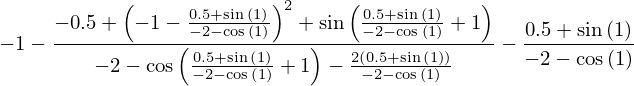

In [ ]:
r1=newton_raphson1(f,-1,3)
r1

Para evitar isso convertemos a entrada para float dentro do procedimento:

In [ ]:
def newton_raphson2(f,a,N):
    x0=float(a)
    for i in range(1,N):
        x1=x0-f(x0)/Df(x0)
        x0=x1
    return x0

In [ ]:
r1=newton_raphson2(f,-1,3)
r1

O seguinte procedimento tem como entrada um ponto inicial, o ponto inicial $a$, o número máximo de interações *Nmax* e a tolerância para o erro $\epsilon$. Como saída temos a raiz e o número de interações realizadas:

In [ ]:
def newton_raphson3(f,a,Nmax, epsilon):
    erro=1
    n=0
    x0=float(a)
    df=diff(f(x),x)
    Df= Lambda(x,df)
    while erro>epsilon and n<Nmax:
        x1=x0-f(x0)/Df(x0)
        erro=abs(x1-x0)
        n=n+1
        x0=x1
    return x1,n

In [ ]:
r1=newton_raphson3(f,1,20,10**(-8))
r1

Verifiquemos  a acurácia do resultado:

In [ ]:
f(r1[0])

### 3. Exercícios

<bf>1.</bf> Use o método de Newton-Raphson para determinar a raiz real de $f(x)=x-\sin(x)+2$, com tolerância de intervalo $\epsilon = 10^{-8}$. Quantas iterações seriam necessárias para obter a  mesma raiz usando o método da bissecção (determine esse número sem aplicar o método).


<bf>2.</bf> Seja a função $f(x)=x^2+x\sin(x^3)+3x-10$. <br>
(i) Faça um gráfico desta função. <br>
(ii) Determine todas as raízes reais positivas, usando o método de Newton-Raphson, com uma tolerância de intervalo $\epsilon = 10^{-10}$.<br>
(iii) Use o método de Newton-Raphson com tolerância de intervalo $\epsilon = 10^{-10}$ para determinar os extremos relativos (especificando $x$ e $f(x)$ de $f(x)$ no intervalo $[1.5, 2.2]$.

In [ ]:
from matplotlib.pyplot import *
from sympy import *
init_printing()

In [ ]:
x=symbols('x')
f= Lambda(x, x**2+x*sin(x**3)+3*x-10)
f(x)

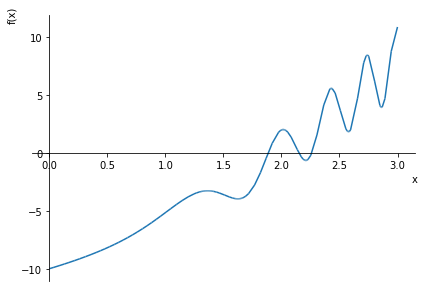

In [ ]:
plot(f(x),(x,0,3))